In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

from functools import reduce
from scipy import stats
from scipy.stats import pearsonr

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.info()
games.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


# Preparing Data

In [5]:
#making column titles lowercase
games.columns = map(str.lower, games.columns)

In [6]:
games.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9665,SCORE International Baja 1000: The Official Game,X360,2008.0,Racing,0.11,0.01,0.0,0.01,NaN,NaN,NaN


In [7]:
#converting release year to integer type
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

#converting the critic scores to integer type
games['critic_score'] = games['critic_score'].fillna(0).astype(int)

- For the values in the 'year_of_release' column, I decided to change them to ints as years are never represented as numbers with decimal places and leaving them as such would likely lead to confusion and messy data 

- It's hard to say why the values  are missing. I thought there might be correlation with the age of the games/system. 

- I decided to treat TBD as NaN and where applicable will replace with 0

In [8]:
#dealing with the tbd in user score values
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

games['user_score'] = games['user_score'].fillna(0).astype(float)

In [9]:
#calculating total sales
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [13]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,NaN,28.31


# Analyzing Data

### Games Released in Different Years

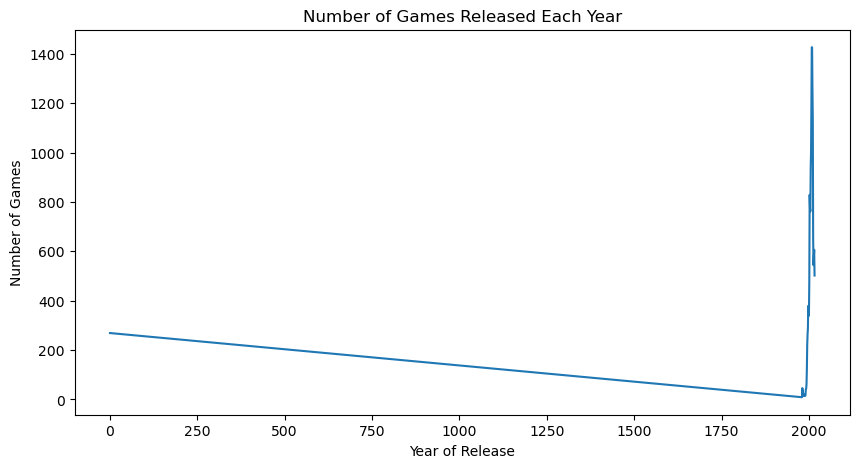

In [25]:
games_per_year = games['year_of_release'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(games_per_year.index, games_per_year.values)
plt.title('Number of Games Released Each Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.show()


Not every period has data that is significant. Given that the first video game system didn't exist until approx 1972 (according to the following: https://en.wikipedia.org/wiki/History_of_video_game_consoles) data from any years prior to that probably wouldn't be very useful or accurate.

As such I think it might be valuable to also show a plot of data starti